In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv


In [2]:
data= pd.read_csv("/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv")
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [4]:
data["Salary"].describe()

count        30.000000
mean      76004.000000
std       27414.429785
min       37732.000000
25%       56721.750000
50%       65238.000000
75%      100545.750000
max      122392.000000
Name: Salary, dtype: float64

In [5]:
data["Salary"].corr(data["YearsExperience"])

0.9782416184887598

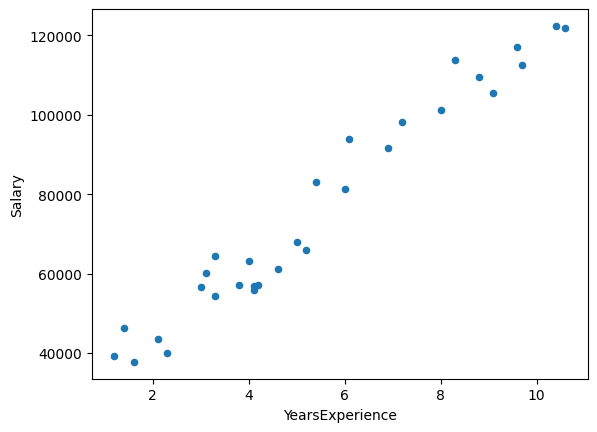

In [6]:
import matplotlib.pyplot as plt
data.plot(x= "YearsExperience", y= "Salary", kind= "scatter")
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [8]:
x= data["YearsExperience"].values.reshape(-1, 1)
y= data["Salary"].values
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size= 0.3, random_state= 42)
x_train.shape, x_test.shape

((21, 1), (9, 1))

In [9]:
model= LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [10]:
y_test_pred= model.predict(x_test)
y_test_pred

array([115574.62288352,  71680.93878159, 102499.90847018,  75416.57147111,
        55804.4998511 ,  60474.04071301, 122111.98009019, 107169.44933209,
        63275.76523015])

In [11]:
y_train_pred= model.predict(x_train)
y_train_pred

array([ 36192.42823109,  46465.41812729,  73548.75512635,  53002.77533396,
        64209.67340254,  63275.76523015,  99698.18395303,  38060.24457585,
        39928.06092062, 109971.17384923,  44597.60178252,  92226.91857398,
       114640.71471114,  81020.0205054 , 123979.79643495,  89425.19405684,
        55804.4998511 ,  62341.85705777,  67945.30609206,  81953.92867778,
        53936.68350634])

In [12]:
model.score(x_test,y_test_pred)

1.0

In [13]:
model.score(x_train,y_train_pred)

1.0

In [14]:
R2_train= r2_score(y_train,y_train_pred)
R2_test= r2_score(y_test,y_test_pred)
print(R2_train,"  ",R2_test)

0.9574526669392872    0.9414466227178215
